In [2601]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


pd.options.display.max_columns = 999

In [2602]:
#Read Data
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2603]:
df.shape

(9240, 37)

In [2604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There ar; 30 categorical variables, 4 float64 variables and 2 integer variables

## Check Null Variables

In [2605]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

## Splitting Categorical Variables and Numerical Variable

In [2606]:
numerical_cols = df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].keys()

In [2607]:
categorical_cols = df.dtypes[~(df.dtypes == 'int64') & ~(df.dtypes == 'float64')].keys()

In [2608]:
numerical_df = df[numerical_cols]

In [2609]:
categorical_df = df[categorical_cols]

## Treating Numerical Columns

In [2610]:
numerical_df

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,660737,0,0.0,0,0.00,15.0,15.0
1,660728,0,5.0,674,2.50,15.0,15.0
2,660727,1,2.0,1532,2.00,14.0,20.0
3,660719,0,1.0,305,1.00,13.0,17.0
4,660681,1,2.0,1428,1.00,15.0,18.0
...,...,...,...,...,...,...,...
9235,579564,1,8.0,1845,2.67,15.0,17.0
9236,579546,0,2.0,238,2.00,14.0,19.0
9237,579545,0,2.0,199,2.00,13.0,20.0
9238,579538,1,3.0,499,3.00,15.0,16.0


In [2611]:
(numerical_df.isnull().sum()/numerical_df.shape[0]*100).sort_values(ascending = False)

Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
TotalVisits                     1.482684
Page Views Per Visit            1.482684
Lead Number                     0.000000
Converted                       0.000000
Total Time Spent on Website     0.000000
dtype: float64

There are alot of null values present in Asymmetrique Activity Score and Asymmetrique Profile Score features. We will drop these 2 columns

In [2612]:
numerical_df = numerical_df.drop(['Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis = 1)

In [2613]:
(numerical_df.isnull().sum()/numerical_df.shape[0]*100).sort_values(ascending = False)

TotalVisits                    1.482684
Page Views Per Visit           1.482684
Lead Number                    0.000000
Converted                      0.000000
Total Time Spent on Website    0.000000
dtype: float64

 TotalVisits and Page Views Per Visit features have few null values. We can correct this my imputing median

In [2614]:
from sklearn.impute import SimpleImputer

In [2615]:
imput_median = SimpleImputer(missing_values = np.nan, strategy='median')

In [2616]:
numerical_df[['TotalVisits', 'Page Views Per Visit']] = imput_median.fit_transform(numerical_df[['TotalVisits', 'Page Views Per Visit']])

In [2617]:
(numerical_df.isnull().sum()/numerical_df.shape[0]*100).sort_values(ascending = False)

Lead Number                    0.0
Converted                      0.0
TotalVisits                    0.0
Total Time Spent on Website    0.0
Page Views Per Visit           0.0
dtype: float64

## Treating Categorical Columns

In [2618]:
(categorical_df.isnull().sum()/categorical_df.shape[0]*100).sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Last Activity                                     1.114719
Lead Source                                       0.389610
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.0000

The are alot of null values in the following features: Lead Quality ,  Asymmetrique Activity Index and Asymmetrique Profile Index. We will drop all features with null value percentage >= 45%

In [2619]:
categorical_df = categorical_df.drop(['Lead Quality', 'Asymmetrique Activity Index','Asymmetrique Profile Index'], axis = 1)

In [2620]:
(categorical_df.isnull().sum()/categorical_df.shape[0]*100).sort_values(ascending = False)

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Last Activity                                     1.114719
Lead Source                                       0.389610
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
Prospect ID                                       0.000000
Through Recommendations                           0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Receive More Updates About Our Courses            0.0000

Checking the null values in relation to other columns to see if we can get any insights.

We will start by checking Lead Source

In [2621]:
categorical_df[(categorical_df['Lead Source'].isnull())][['Lead Origin', 'Lead Source', 'Last Activity', 'City', 'Specialization', 'Country', 'Tags']]

,Lead Origin,Lead Source,Last Activity,City,Specialization,Country,Tags
836,Lead Add Form,NaN,Email Bounced,Select,Select,NaN,NaN
1569,Lead Add Form,NaN,SMS Sent,Select,Select,NaN,Will revert after reading the email
1746,Lead Add Form,NaN,SMS Sent,Select,Select,NaN,NaN
2020,Lead Add Form,NaN,SMS Sent,Select,Select,NaN,NaN
2025,Lead Add Form,NaN,SMS Sent,Select,Select,NaN,Will revert after reading the email
2152,Lead Add Form,NaN,SMS Sent,Select,Select,NaN,NaN
2346,Lead Add Form,NaN,SMS Sent,Select,Select,NaN,Will revert after reading the email
2544,Lead Import,NaN,Email Opened,Select,Select,NaN,number not provided
2601,Quick Add Form,NaN,Email Bounced,Other Metro Cities,E-COMMERCE,NaN,NaN
2676,Lead Add Form,NaN,SMS Sent,Other Cities of Maharashtra,Human Resource Management,NaN,Will revert after reading the email


It seems the source of the data maybe a CRM or CVM defined some columns as not mendatory. As a results they have default values like Select, which means the user did not select any option from a drop down menu. 

Lead source is mostly null when Lead Origin is **Lead Add Form**, and most of the times **City** is not seleted as well as **Country**.

Tag is mostly either **NaN** or **Will revert after reading the email**

In [2622]:
categorical_df[(categorical_df['Last Activity'].isnull())][['Lead Origin', 'Lead Source', 'Last Activity', 'City', 'Specialization', 'Country', 'Tags']]

,Lead Origin,Lead Source,Last Activity,City,Specialization,Country,Tags
77,Lead Add Form,Welingak Website,NaN,Select,Select,NaN,NaN
79,Lead Add Form,Reference,NaN,Thane & Outskirts,Hospitality Management,NaN,Will revert after reading the email
81,Lead Add Form,Welingak Website,NaN,Select,Select,NaN,NaN
88,Lead Add Form,Reference,NaN,Mumbai,Human Resource Management,NaN,Closed by Horizzon
120,Lead Add Form,Reference,NaN,Other Cities,Marketing Management,NaN,Closed by Horizzon
...,...,...,...,...,...,...,...
8097,Lead Add Form,Reference,NaN,Select,Marketing Management,NaN,Interested in full time MBA
8107,Lead Add Form,Reference,NaN,Select,"Banking, Investment And Insurance",NaN,Lost to EINS
8434,Lead Add Form,Reference,NaN,Select,Select,NaN,Closed by Horizzon
9015,Lead Add Form,Reference,NaN,Mumbai,Supply Chain Management,NaN,Closed by Horizzon


Here we are noticing that leads from **Welingak Website and Reference** are not having any activity on the platform. Country is also not defines but most of the Cities are from India

In [2623]:
(categorical_df.isnull().sum()/categorical_df.shape[0]*100).sort_values(ascending = False)

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Last Activity                                     1.114719
Lead Source                                       0.389610
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
Prospect ID                                       0.000000
Through Recommendations                           0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Receive More Updates About Our Courses            0.0000

In [2624]:
categorical_df.groupby(['Tags'])['Tags'].count().sort_values(ascending = False)

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

We have 36% Null values in Tag Feature. Most of people replied with **Will revert after reading the email**, while a good number of people their phones were just Ringing

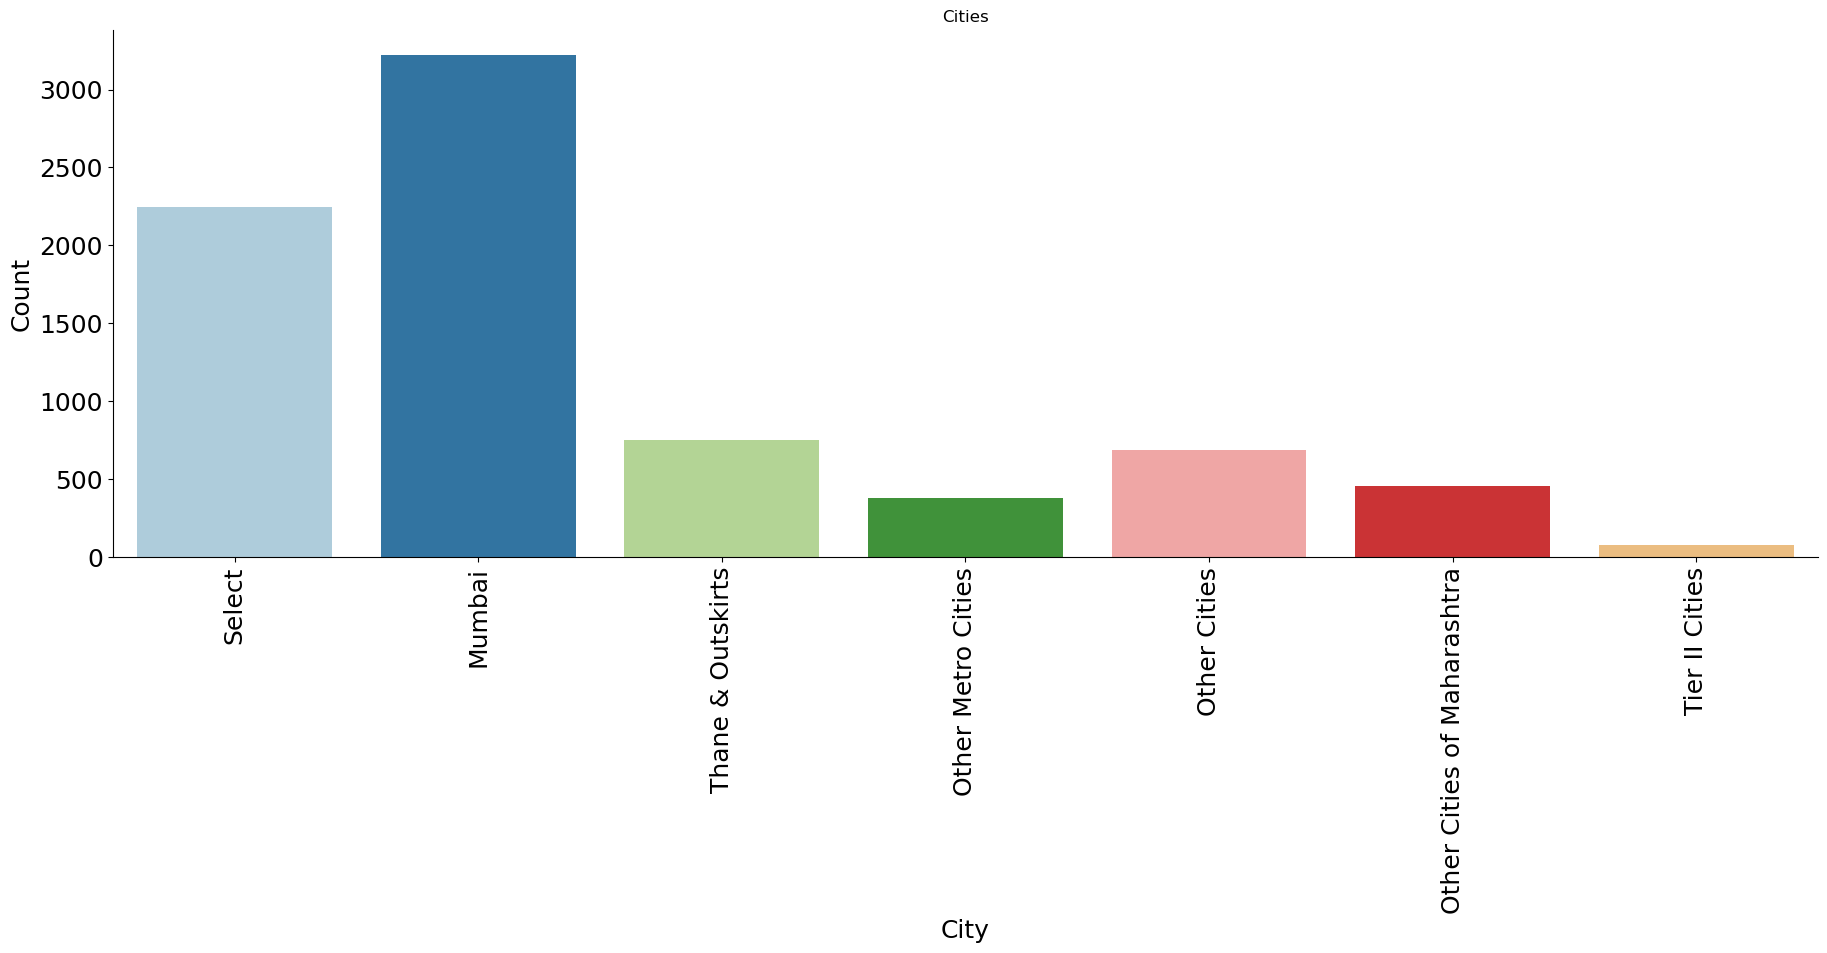

In [2625]:
sns.catplot(data = categorical_df, x = 'City', kind = 'count', palette = 'Paired', aspect = 3, height=6).set(title = 'Cities')
plt.xticks(rotation = 'vertical')
plt.tick_params(labelsize=18)
plt.xlabel("City", size = 18)
plt.ylabel("Count", size = 18)
plt.show()

City has 15% Null values. Most people are from Mumbai City and a Good number users did not select City.

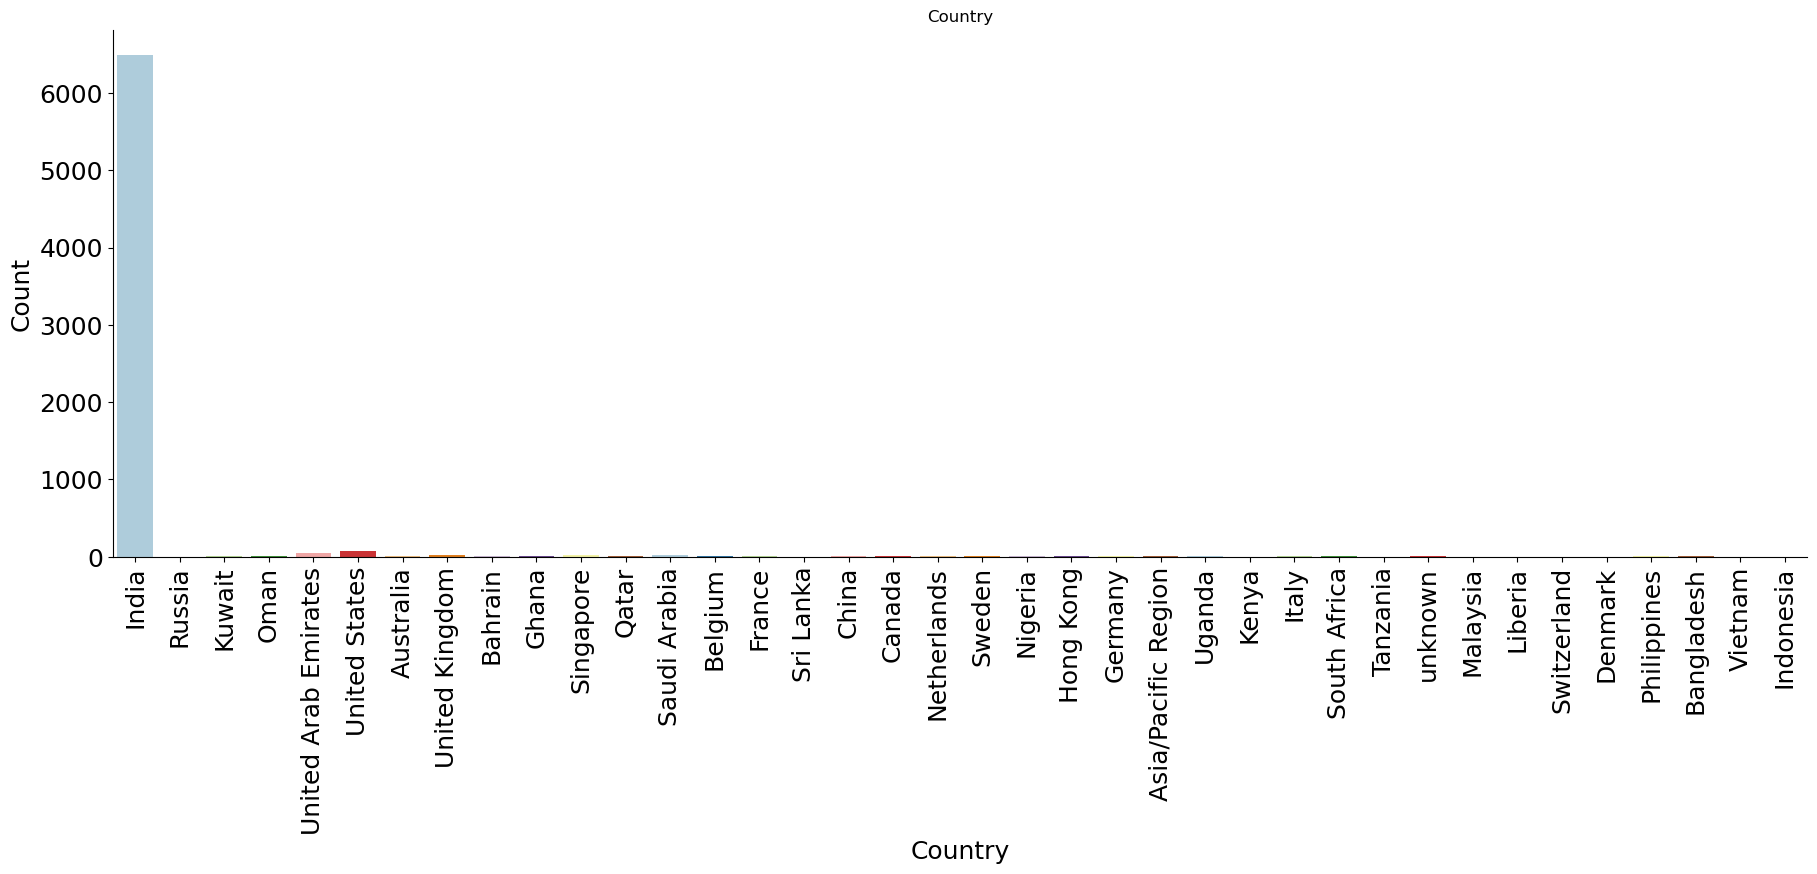

In [2626]:
sns.catplot(data = categorical_df, x = 'Country', kind = 'count', palette = 'Paired', aspect = 3, height=6).set(title = 'Country')
plt.xticks(rotation = 'vertical')
plt.tick_params(labelsize=18)
plt.xlabel("Country", size = 18)
plt.ylabel("Count", size = 18)
plt.show()

Majority of the users are from India. And Country has 26% Null values

In [2627]:
categorical_df.groupby(['Specialization'])['Specialization'].count().sort_values(ascending = False)

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Specialization has 15% Null Values, and **1942** of the users did not select specialization. **Finance Management, Human Resource Management and Marketing Management** are the most selected specilizations

<AxesSubplot:ylabel='Lead Profile'>

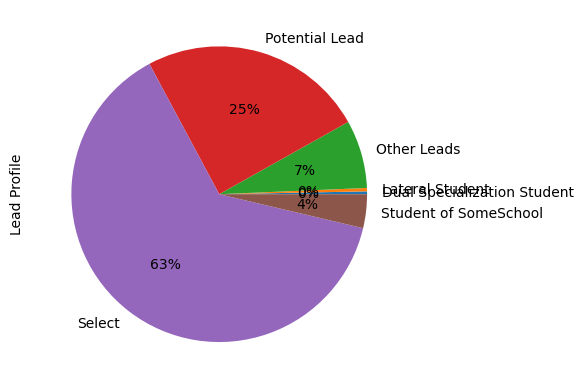

In [2628]:

categorical_df.groupby(['Lead Profile'])['Lead Profile'].count().plot(
    kind='pie', y='Lead Profile', autopct='%1.0f%%')

In [2629]:
plt.show()

Lead profile has 29% null values. 63 % of the leads did not select profile

In [2630]:
categorical_df.groupby(['Lead Source'])['Lead Source'].count().sort_values(ascending = False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

**Google, Direct Traffic,Olark Chat and Organic Search** are the popular lead sources. 

In [2631]:
categorical_df.groupby(['What matters most to you in choosing a course'])['What matters most to you in choosing a course'].count().sort_values(ascending = False)

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

This feature 29% Null values and almost every one selected **Better Career Prospects**

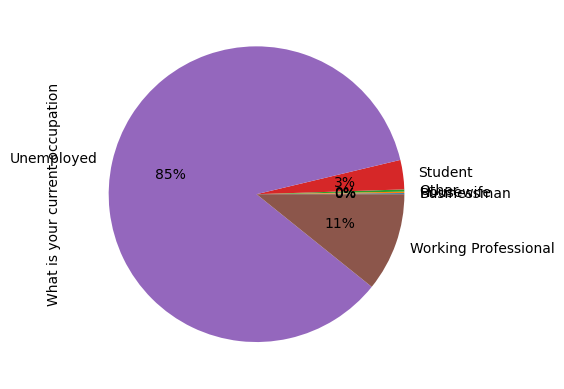

In [2632]:

categorical_df.groupby(['What is your current occupation'])['What is your current occupation'].count().plot(
    kind='pie', y='Occupaation', autopct='%1.0f%%')
plt.show()


Occupation and 29% null values and 85% of the leads are **unemployed**

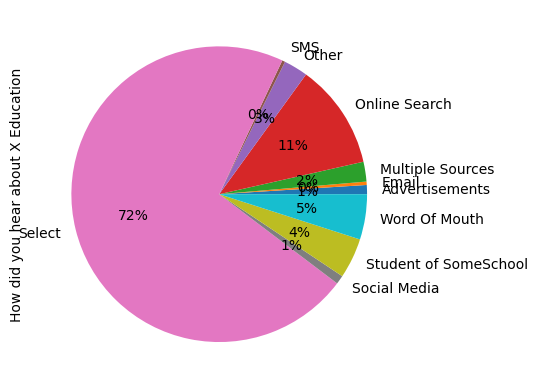

In [2633]:

categorical_df.groupby(['How did you hear about X Education'])['How did you hear about X Education'].count().plot(
    kind='pie', y='How did you hear about X Education ', autopct='%1.0f%%')
plt.show()

This feature has 23% Null values and 72% of the lead did not Select any option. But if we exclude **Select** then Online search is most popular

### Categorical Variables Engineering

In [2634]:
categorical_df.groupby(['Lead Source'])['Lead Source'].count().sort_values(ascending = False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

Google and google are same thing, Just that one is starting with Uppercase while the other is all lowercase. We will rename **google** to **Google** and we will other create another Lead Source **Other Sources** which will take all Null values since they are just 36

In [2635]:
categorical_df['Lead Source'].replace(to_replace = 'google', value = 'Google', inplace = True)
categorical_df['Lead Source'].replace(to_replace = np.nan, value = 'Other Sources', inplace = True)

In [2636]:
categorical_df.groupby(['Lead Source'])['Lead Source'].count().sort_values(ascending = False)

Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Other Sources          36
bing                    6
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

Imputing Cetegorical Variable Country

In [2637]:
categorical_df.groupby(['Country'])['Country'].count().sort_values(ascending = False)

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Nigeria                    4
South Africa               4
Germany                    4
Canada                     4
Sweden                     3
Uganda                     2
Philippines                2
Asia/Pacific Region        2
Italy                      2
Ghana                      2
China                      2
Belgium                    2
Bangladesh                 2
Netherlands                2
Malaysia                   1
Liberia                    1
Russia                     1
Kenya                      1
Indonesia                  1
Sri Lanka                  1
Switze

In [2638]:
categorical_df['Country'].replace(to_replace = ['Select', np.nan], value = 'Not_Specified', inplace = True)

In [2639]:
categorical_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,Not_Specified,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


We will also replace Null values with **Not_Specified** for the features Specialization, Lead Profile and How did you hear about X Education

In [2640]:
categorical_df['Specialization'].replace(to_replace = ['Select', np.nan], value = 'Unspecified', inplace = True)
categorical_df['City'].replace(to_replace = ['Select', np.nan], value = 'Unspecified', inplace = True)
categorical_df['Lead Profile'].replace(to_replace = ['Select', np.nan], value = 'Unspecified', inplace = True)
categorical_df['How did you hear about X Education'].replace(to_replace = ['Select', np.nan], value = 'Unspecified', inplace = True)

In [2641]:
(categorical_df.isnull().sum()/categorical_df.shape[0]*100).sort_values(ascending = False)

Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Last Activity                                     1.114719
Prospect ID                                       0.000000
Newspaper                                         0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
City                                              0.000000
Lead Profile                                      0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

Imputing Cetegorical Variable **Last Activity**

In [2642]:
categorical_df[categorical_df['Last Activity'].isnull()]

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,895d4905-f534-4f18-915b-8d239a72b5dc,Lead Add Form,Welingak Website,No,No,NaN,Not_Specified,Unspecified,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Unspecified,No,No,Modified
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,Lead Add Form,Reference,No,No,NaN,Not_Specified,Hospitality Management,Unspecified,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Thane & Outskirts,No,No,Modified
81,277ad6a6-4565-4a18-a1ff-e46e03f22663,Lead Add Form,Welingak Website,No,No,NaN,Not_Specified,Unspecified,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Unspecified,No,No,Modified
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,Lead Add Form,Reference,No,No,NaN,Not_Specified,Human Resource Management,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,No,No,Lateral Student,Mumbai,No,No,Modified
120,144807db-2895-4002-b52e-3eda79c22395,Lead Add Form,Reference,No,No,NaN,Not_Specified,Marketing Management,Unspecified,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,No,No,Potential Lead,Other Cities,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,82f3035c-0750-4f09-a0cc-4288abb88042,Lead Add Form,Reference,No,No,NaN,Not_Specified,Marketing Management,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in full time MBA,No,No,Unspecified,Unspecified,No,No,Modified
8107,7e66be45-783c-4983-b4cd-c6594bbbeee8,Lead Add Form,Reference,No,No,NaN,Not_Specified,"Banking, Investment And Insurance",Unspecified,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Lost to EINS,No,No,Potential Lead,Unspecified,No,No,Modified
8434,f5be8a84-bfa2-46a6-816a-af81a45ea6b9,Lead Add Form,Reference,No,No,NaN,Not_Specified,Unspecified,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,No,No,Unspecified,Unspecified,No,No,Modified
9015,5857eeef-41cb-4523-a654-8709f6c8d8c6,Lead Add Form,Reference,No,No,NaN,Not_Specified,Supply Chain Management,Unspecified,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,No,No,Potential Lead,Mumbai,No,No,Modified


Last Activity and Tag columns seem related. Last Activity = last activity from the lead itself and Tag = more of last comment from CRM user. We will use **Tag** to impute Last Activity

In [2643]:
categorical_df[categorical_df['Last Activity'].isnull()]['Tags'].value_counts()

Closed by Horizzon                     47
Will revert after reading the email    26
Ringing                                12
Interested in other courses             4
Lost to EINS                            2
number not provided                     1
Busy                                    1
Interested  in full time MBA            1
Name: Tags, dtype: int64

In [2644]:
categorical_df[(categorical_df['Tags'] == 'Closed by Horizzon')]['Last Activity'].mode()

0    Email Opened
Name: Last Activity, dtype: object

In [2645]:
categorical_df.loc[(categorical_df['Last Activity'].isnull()) & (categorical_df['Tags'] == 'Closed by Horizzon'), 'Last Activity'] = 'Email Opened'

In [2646]:
categorical_df[(categorical_df['Tags'] == 'Will revert after reading the email')]['Last Activity'].mode()

0    SMS Sent
Name: Last Activity, dtype: object

In [2647]:
categorical_df.loc[(categorical_df['Last Activity'].isnull()) & (categorical_df['Tags'] == 'Will revert after reading the email'), 'Last Activity'] = 'SMS Sent'

In [2648]:
categorical_df[(categorical_df['Tags'] == 'Ringing')]['Last Activity'].mode()

0    Email Opened
Name: Last Activity, dtype: object

In [2649]:
categorical_df.loc[(categorical_df['Last Activity'].isnull()) & (categorical_df['Tags'] == 'Ringing'), 'Last Activity'] = 'Email Opened'

In [2650]:
print(categorical_df[(categorical_df['Tags'] == 'Interested in other courses')]['Last Activity'].mode())
print(categorical_df[(categorical_df['Tags'] == 'number not provided')]['Last Activity'].mode())
print(categorical_df[(categorical_df['Tags'] == 'Busy')]['Last Activity'].mode())
print(categorical_df[(categorical_df['Tags'] == 'Interested  in full time MBA')]['Last Activity'].mode())

0    Email Opened
Name: Last Activity, dtype: object
0    SMS Sent
Name: Last Activity, dtype: object
0    SMS Sent
Name: Last Activity, dtype: object
0    Email Opened
Name: Last Activity, dtype: object


In [2651]:
categorical_df.loc[(categorical_df['Last Activity'].isnull()) & (categorical_df['Tags'] == 'Interested in other courses'), 'Last Activity'] = 'Email Opened'
categorical_df.loc[(categorical_df['Last Activity'].isnull()) & (categorical_df['Tags'] == 'number not provided'), 'Last Activity'] = 'SMS Sent'
categorical_df.loc[(categorical_df['Last Activity'].isnull()) & (categorical_df['Tags'] == 'Busy'), 'Last Activity'] = 'SMS Sent'
categorical_df.loc[(categorical_df['Last Activity'].isnull()) & (categorical_df['Tags'] == 'Interested  in full time MBA'), 'Last Activity'] = 'Email Opened'

In [2652]:
categorical_df[categorical_df['Last Activity'].isnull()]['Tags'].value_counts()

Lost to EINS    2
Name: Tags, dtype: int64

In [2653]:
categorical_df[(categorical_df['Tags'] == 'Lost to EINS')]['Last Activity'].mode()

0    Email Opened
Name: Last Activity, dtype: object

In [2654]:
categorical_df.loc[(categorical_df['Last Activity'].isnull()) & (categorical_df['Tags'] == 'Lost to EINS'), 'Last Activity'] = 'Email Opened'

In [2655]:
categorical_df[categorical_df['Last Activity'].isnull()]['Tags'].value_counts()

Series([], Name: Tags, dtype: int64)

In [2656]:
categorical_df[categorical_df['Last Activity'].isnull()]

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,895d4905-f534-4f18-915b-8d239a72b5dc,Lead Add Form,Welingak Website,No,No,NaN,Not_Specified,Unspecified,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Unspecified,No,No,Modified
81,277ad6a6-4565-4a18-a1ff-e46e03f22663,Lead Add Form,Welingak Website,No,No,NaN,Not_Specified,Unspecified,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Unspecified,No,No,Modified
134,0298b9a5-fedb-408b-a284-2d357583600f,Lead Add Form,Welingak Website,No,No,NaN,Not_Specified,Unspecified,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Unspecified,No,No,Modified
179,1730b5e8-e435-41c6-9082-b9c98976bd16,Lead Add Form,Welingak Website,No,No,NaN,Not_Specified,Unspecified,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Unspecified,No,No,Modified
180,db2dc4b5-f603-4818-9b0c-0435923a4cd8,Lead Add Form,Welingak Website,No,No,NaN,Not_Specified,Unspecified,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Unspecified,No,No,Modified
994,1627d1fe-f39b-4a29-ba9e-ab40ab643d05,Lead Add Form,Welingak Website,No,No,NaN,Not_Specified,Unspecified,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Unspecified,No,No,Modified
1393,a8672970-1a5d-48c9-a376-821853b6d180,Lead Add Form,Welingak Website,No,No,NaN,Not_Specified,Unspecified,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Unspecified,No,No,Modified
2942,2d16315d-5afa-401e-b21a-66467bebaa70,Lead Add Form,Reference,No,No,NaN,Not_Specified,Unspecified,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Unspecified,No,No,Modified
5840,08b0957c-8296-4e8e-bc4a-1c688f1a1f7e,Lead Add Form,Other Sources,No,No,NaN,Not_Specified,Unspecified,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Unspecified,No,No,Modified


In [2657]:
categorical_df['Last Activity'].replace(to_replace = np.nan, value = 'Email Opened', inplace = True)

In [2658]:
categorical_df.isnull().sum().sort_values(ascending = False)

Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Prospect ID                                         0
Newspaper                                           0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
City                                                0
Lead Profile                                        0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper Article                                   0
X Education Forums                                  0
Lead Origin                                         0
Magazine                                            0
Search                      

In [2659]:
(categorical_df.isnull().sum()/categorical_df.shape[0]*100).sort_values(ascending = False)

Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Prospect ID                                       0.000000
Newspaper                                         0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
City                                              0.000000
Lead Profile                                      0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Lead Origin                                       0.0000

### Engineering  Occupation

In [2660]:
categorical_df.groupby(['What is your current occupation'])['What is your current occupation'].count().sort_values(ascending = False)

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [2661]:
#Impulting with most frequest Option "Unemployed"
categorical_df["What is your current occupation"].replace(to_replace = np.nan, value = 'Unemployed', inplace = True)

In [2662]:
categorical_df.groupby(['What matters most to you in choosing a course'])['What matters most to you in choosing a course'].count().sort_values(ascending = False)

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [2663]:
#Impulting with most frequest Option "Better Career Prospects"
categorical_df["What matters most to you in choosing a course"].replace(to_replace = np.nan, value = 'Better Career Prospects', inplace = True)

In [2664]:
(categorical_df.isnull().sum()/categorical_df.shape[0]*100).sort_values(ascending = False)

C:\Users\j.mandiza\Anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Tags                                             36.287879
Prospect ID                                       0.000000
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
City                                              0.000000
Lead Profile                                      0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Newspaper Article                                 0.000000
Lead Origin                                       0.000000
Magazine                                          0.000000
Search                                            0.0000

In [2665]:
categorical_df.groupby(['Tags'])['Tags'].count().sort_values(ascending = False)

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [2666]:
categorical_df[categorical_df['Tags'].isnull()]

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
5,2058ef08-2858-443e-a01f-a9237db2f5ce,API,Olark Chat,No,No,Olark Chat Conversation,Not_Specified,Unspecified,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Unspecified,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,API,Olark Chat,No,No,Olark Chat Conversation,Not_Specified,Unspecified,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Unspecified,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,IT Projects Management,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Thane & Outskirts,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,API,Google,No,No,Email Opened,India,Finance Management,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Mumbai,No,No,Email Opened
14,a8531c22-fcf1-48f8-a711-fb5abf98ad87,Landing Page Submission,Direct Traffic,Yes,No,Email Bounced,Russia,Business Administration,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Unspecified,No,No,Email Bounced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9213,d4587acb-02d1-4c5e-9110-6032d829bac1,Landing Page Submission,Direct Traffic,Yes,No,Page Visited on Website,India,E-COMMERCE,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Mumbai,No,No,Modified
9214,479a8b1c-d410-4220-a24f-854a376be43d,API,Organic Search,No,No,SMS Sent,India,Unspecified,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Unspecified,No,No,SMS Sent
9215,06334ac1-64a8-444c-92a7-117dcd26dea5,Landing Page Submission,Organic Search,No,No,Email Opened,India,Business Administration,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Thane & Outskirts,No,Yes,Email Opened
9218,eee466be-b98c-4126-9220-fc406093b9ce,Landing Page Submission,Google,Yes,No,Email Bounced,India,Human Resource Management,Student of SomeSchool,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Unspecified,Mumbai,No,No,Modified


In [2667]:
categorical_df[categorical_df['Tags'].isnull()].groupby(['Lead Origin','Lead Source','Last Activity'])['Lead Origin'].count().sort_values(ascending = False)

Lead Origin              Lead Source     Last Activity               
API                      Olark Chat      Olark Chat Conversation         464
                                         Email Opened                    347
Landing Page Submission  Direct Traffic  Email Opened                    251
                         Google          Email Opened                    226
API                      Google          Email Opened                    189
                                                                        ... 
                         Referral Sites  SMS Sent                          1
Landing Page Submission  NC_EDM          Email Opened                      1
                         Google          View in browser link Clicked      1
API                      bing            Page Visited on Website           1
Quick Add Form           Other Sources   Email Bounced                     1
Name: Lead Origin, Length: 107, dtype: int64

In [2668]:
print((categorical_df[(categorical_df['Lead Origin'] == 'API') & (categorical_df['Lead Source'] == 'Olark Chat') & (categorical_df['Last Activity'] == 'Olark Chat Conversation')]['Tags']).mode())
print((categorical_df[(categorical_df['Lead Origin'] == 'API') & (categorical_df['Lead Source'] == 'Olark Chat') & (categorical_df['Last Activity'] == 'Email Opened')]['Tags']).mode())
print((categorical_df[(categorical_df['Lead Origin'] == 'Landing Page Submission') & (categorical_df['Lead Source'] == 'Direct Traffic') & (categorical_df['Last Activity'] == 'Email Opened')]['Tags']).mode())
print((categorical_df[(categorical_df['Lead Origin'] == 'Landing Page Submission') & (categorical_df['Lead Source'] == 'Google') & (categorical_df['Last Activity'] == 'Email Opened')]['Tags']).mode())
print((categorical_df[(categorical_df['Lead Origin'] == 'API') & (categorical_df['Lead Source'] == 'Google') & (categorical_df['Last Activity'] == 'Email Opened')]['Tags']).mode())


0    Already a student
Name: Tags, dtype: object
0    Will revert after reading the email
Name: Tags, dtype: object
0    Ringing
Name: Tags, dtype: object
0    Will revert after reading the email
Name: Tags, dtype: object
0    Will revert after reading the email
Name: Tags, dtype: object


In [2669]:
categorical_df.loc[(categorical_df['Tags'].isnull()) & (categorical_df['Lead Origin'] == 'API') & (categorical_df['Lead Source'] == 'Olark Chat') & (categorical_df['Last Activity'] == 'Olark Chat Conversation'), 'Tags'] = 'Already a student'
categorical_df.loc[(categorical_df['Tags'].isnull()) & (categorical_df['Lead Origin'] == 'API') & (categorical_df['Lead Source'] == 'Olark Chat') & (categorical_df['Last Activity'] == 'Email Opened'), 'Tags'] = 'Will revert after reading the email'
categorical_df.loc[(categorical_df['Tags'].isnull()) & (categorical_df['Lead Origin'] == 'Landing Page Submission') & (categorical_df['Lead Source'] == 'Direct Traffic') & (categorical_df['Last Activity'] == 'Email Opened'), 'Tags'] = 'Ringing'
categorical_df.loc[(categorical_df['Tags'].isnull()) & (categorical_df['Lead Origin'] == 'Landing Page Submission') & (categorical_df['Lead Source'] == 'Google') & (categorical_df['Last Activity'] == 'Email Opened'), 'Tags'] = 'Will revert after reading the email'
categorical_df.loc[(categorical_df['Tags'].isnull()) & (categorical_df['Lead Origin'] == 'API') & (categorical_df['Lead Source'] == 'Google') & (categorical_df['Last Activity'] == 'Email Opened'), 'Tags'] = 'Will revert after reading the email'

In [2670]:
(categorical_df.isnull().sum()/categorical_df.shape[0]*100).sort_values(ascending = False)

Tags                                             20.30303
Prospect ID                                       0.00000
X Education Forums                                0.00000
A free copy of Mastering The Interview            0.00000
I agree to pay the amount through cheque          0.00000
City                                              0.00000
Lead Profile                                      0.00000
Get updates on DM Content                         0.00000
Update me on Supply Chain Content                 0.00000
Receive More Updates About Our Courses            0.00000
Through Recommendations                           0.00000
Digital Advertisement                             0.00000
Newspaper                                         0.00000
Newspaper Article                                 0.00000
Lead Origin                                       0.00000
Magazine                                          0.00000
Search                                            0.00000
What matters m

In [2671]:
categorical_df[categorical_df['Tags'].isnull()].groupby(['Lead Origin','Lead Source'])['Lead Origin'].count().sort_values(ascending = False)

Lead Origin              Lead Source     
Landing Page Submission  Direct Traffic      421
API                      Google              311
Landing Page Submission  Google              289
API                      Olark Chat          258
Landing Page Submission  Organic Search      181
API                      Organic Search      169
Lead Add Form            Welingak Website    103
API                      Direct Traffic       48
                         Referral Sites       40
Lead Import              Facebook             15
Landing Page Submission  Referral Sites       11
Lead Add Form            Other Sources        10
                         Reference             8
API                      bing                  3
Landing Page Submission  Press_Release         1
                         bing                  1
                         blog                  1
                         welearnblog_Home      1
                         youtubechannel        1
Lead Add Form            Cl

In [2672]:
print((categorical_df[(categorical_df['Lead Origin'] == 'Landing Page Submission') & (categorical_df['Lead Source'] == 'Direct Traffic')]['Tags']).mode())
print((categorical_df[(categorical_df['Lead Origin'] == 'API') & (categorical_df['Lead Source'] == 'Google') ]['Tags']).mode())
print((categorical_df[(categorical_df['Lead Origin'] == 'Landing Page Submission') & (categorical_df['Lead Source'] == 'Google') ]['Tags']).mode())
print((categorical_df[(categorical_df['Lead Origin'] == 'API') & (categorical_df['Lead Source'] == 'Olark Chat') ]['Tags']).mode())
print((categorical_df[(categorical_df['Lead Origin'] == 'Landing Page Submission') & (categorical_df['Lead Source'] == 'Organic Search') ]['Tags']).mode())

0    Ringing
Name: Tags, dtype: object
0    Will revert after reading the email
Name: Tags, dtype: object
0    Will revert after reading the email
Name: Tags, dtype: object
0    Already a student
Name: Tags, dtype: object
0    Will revert after reading the email
Name: Tags, dtype: object


In [2673]:
categorical_df.loc[(categorical_df['Tags'].isnull()) & (categorical_df['Lead Origin'] == 'Landing Page Submission') & (categorical_df['Lead Source'] == 'Direct Traffic') , 'Tags'] = 'Ringing'
categorical_df.loc[(categorical_df['Tags'].isnull()) & (categorical_df['Lead Origin'] == 'API') & (categorical_df['Lead Source'] == 'Google') , 'Tags'] = 'Will revert after reading the email'
categorical_df.loc[(categorical_df['Tags'].isnull()) & (categorical_df['Lead Origin'] == 'Landing Page Submission') & (categorical_df['Lead Source'] == 'Google') , 'Tags'] = 'Will revert after reading the email'
categorical_df.loc[(categorical_df['Tags'].isnull()) & (categorical_df['Lead Origin'] == 'API') & (categorical_df['Lead Source'] == 'Olark Chat') , 'Tags'] = 'Already a student'
categorical_df.loc[(categorical_df['Tags'].isnull()) & (categorical_df['Lead Origin'] == 'Landing Page Submission') & (categorical_df['Lead Source'] == 'Organic Search') , 'Tags'] = 'Will revert after reading the email'

In [2674]:
(categorical_df.isnull().sum()/categorical_df.shape[0]*100).sort_values(ascending = False)

Tags                                             4.502165
Prospect ID                                      0.000000
X Education Forums                               0.000000
A free copy of Mastering The Interview           0.000000
I agree to pay the amount through cheque         0.000000
City                                             0.000000
Lead Profile                                     0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
Newspaper Article                                0.000000
Lead Origin                                      0.000000
Magazine                                         0.000000
Search                                           0.000000
What matters m

In [2675]:
categorical_df.groupby(['Tags'])['Tags'].count().sort_values(ascending = False)

Tags
Will revert after reading the email                  3615
Ringing                                              1875
Already a student                                    1187
Interested in other courses                           513
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [2676]:
#We will impute the remaining NaN values with the most frequest option
categorical_df['Tags'].replace(to_replace = np.nan, value = 'Will revert after reading the email', inplace = True)

In [2677]:
(categorical_df.isnull().sum()/categorical_df.shape[0]*100).sort_values(ascending = False)

Prospect ID                                      0.0
X Education Forums                               0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Lead Profile                                     0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
Newspaper Article                                0.0
Lead Origin                                      0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation               

Renaming columns to user friendly names

In [2678]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9240 non-null   object
 3   Do Not Email                                   9240 non-null   object
 4   Do Not Call                                    9240 non-null   object
 5   Last Activity                                  9240 non-null   object
 6   Country                                        9240 non-null   object
 7   Specialization                                 9240 non-null   object
 8   How did you hear about X Education             9240 non-null   object
 9   What is your current occupation                9240 non-null   

In [2679]:

categorical_df.rename(columns = {'How did you hear about X Education':'Info_Source', 'What is your current occupation':'Occupation'}, inplace = True)
categorical_df.rename(columns = {'What matters most to you in choosing a course':'Enrol_Reason', 'Receive More Updates About Our Courses':'Course_Updates'}, inplace = True)
categorical_df.rename(columns = {'Update me on Supply Chain Content':'Supply_chain_content', 'Get updates on DM Content':'DM_Content'}, inplace = True)
categorical_df.rename(columns = {'I agree to pay the amount through cheque':'Cheque_Payment', 'A free copy of Mastering The Interview':'Master_Interview_Copy'}, inplace = True)


In [2680]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Prospect ID              9240 non-null   object
 1   Lead Origin              9240 non-null   object
 2   Lead Source              9240 non-null   object
 3   Do Not Email             9240 non-null   object
 4   Do Not Call              9240 non-null   object
 5   Last Activity            9240 non-null   object
 6   Country                  9240 non-null   object
 7   Specialization           9240 non-null   object
 8   Info_Source              9240 non-null   object
 9   Occupation               9240 non-null   object
 10  Enrol_Reason             9240 non-null   object
 11  Search                   9240 non-null   object
 12  Magazine                 9240 non-null   object
 13  Newspaper Article        9240 non-null   object
 14  X Education Forums       9240 non-null  

### Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [2681]:
categorical_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,Info_Source,Occupation,Enrol_Reason,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Course_Updates,Tags,Supply_chain_content,DM_Content,Lead Profile,City,Cheque_Payment,Master_Interview_Copy,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,Not_Specified,Unspecified,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Unspecified,Unspecified,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,Unspecified,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Unspecified,Unspecified,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Unspecified,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Unspecified,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,Unspecified,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Unspecified,Mumbai,No,No,Modified


In [2682]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Course_Updates','Supply_chain_content','DM_Content','Cheque_Payment','Master_Interview_Copy']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
categorical_df[varlist] = categorical_df[varlist].apply(binary_map)

In [2683]:
categorical_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,Info_Source,Occupation,Enrol_Reason,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Course_Updates,Tags,Supply_chain_content,DM_Content,Lead Profile,City,Cheque_Payment,Master_Interview_Copy,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,Page Visited on Website,Not_Specified,Unspecified,Unspecified,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,Unspecified,Unspecified,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,Email Opened,India,Unspecified,Unspecified,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Unspecified,Unspecified,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,Email Opened,India,Business Administration,Unspecified,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Potential Lead,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Unspecified,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,Converted to Lead,India,Unspecified,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Unspecified,Mumbai,0,0,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [2684]:
categorical_df.groupby(['Last Notable Activity'])['Last Notable Activity'].count().sort_values(ascending = False)

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
Form Submitted on Website          1
Resubscribed to emails             1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [2685]:
# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(categorical_df['Lead Origin'], prefix='Lead_Origin')
ml1 = ml.drop(['Lead_Origin_Quick Add Form'], 1)
#Adding the results to the master dataframe
categorical_df = pd.concat([categorical_df,ml1], axis=1)


C:\Users\j.mandiza\AppData\Local\Temp\ipykernel_36216\3275016865.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop(['Lead_Origin_Quick Add Form'], 1)


In [2686]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.



# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(categorical_df['Lead Source'], prefix='Lead_Source')

ml1 = ml.drop(['Lead_Source_Pay per Click Ads'], 1)
#Adding the results to the master dataframe
categorical_df = pd.concat([categorical_df,ml1], axis=1)


# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(categorical_df['Last Activity'], prefix='Last_Activity')

ml1 = ml.drop(['Last_Activity_Visited Booth in Tradeshow'], 1)
#Adding the results to the master dataframe
categorical_df = pd.concat([categorical_df,ml1], axis=1)


# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(categorical_df['Country'], prefix='Country')

ml1 = ml.drop(['Country_Not_Specified'], 1)
#Adding the results to the master dataframe
categorical_df = pd.concat([categorical_df,ml1], axis=1)


# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(categorical_df['Specialization'], prefix='Specialization')

ml1 = ml.drop(['Specialization_Unspecified'], 1)
#Adding the results to the master dataframe
categorical_df = pd.concat([categorical_df,ml1], axis=1)


# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(categorical_df['Info_Source'], prefix='Info_Source')

ml1 = ml.drop(['Info_Source_Unspecified'], 1)
#Adding the results to the master dataframe
categorical_df = pd.concat([categorical_df,ml1], axis=1)


# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(categorical_df['Occupation'], prefix='Occupation')

ml1 = ml.drop(['Occupation_Unemployed'], 1)
#Adding the results to the master dataframe
categorical_df = pd.concat([categorical_df,ml1], axis=1)


# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(categorical_df['Enrol_Reason'], prefix='Enrol_Reason')

ml1 = ml.drop(['Enrol_Reason_Other'], 1)
#Adding the results to the master dataframe
categorical_df = pd.concat([categorical_df,ml1], axis=1)

# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(categorical_df['Tags'], prefix='Tags')

ml1 = ml.drop(['Tags_Want to take admission but has financial problems'], 1)
#Adding the results to the master dataframe
categorical_df = pd.concat([categorical_df,ml1], axis=1)


# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(categorical_df['Lead Profile'], prefix='Lead_Profile')

ml1 = ml.drop(['Lead_Profile_Unspecified'], 1)
#Adding the results to the master dataframe
categorical_df = pd.concat([categorical_df,ml1], axis=1)


# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(categorical_df['City'], prefix='City')

ml1 = ml.drop(['City_Unspecified'], 1)
#Adding the results to the master dataframe
categorical_df = pd.concat([categorical_df,ml1], axis=1)


# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(categorical_df['Last Notable Activity'], prefix='Last_Notable_Activity')

ml1 = ml.drop(['Last_Notable_Activity_View in browser link Clicked'], 1)
#Adding the results to the master dataframe
categorical_df = pd.concat([categorical_df,ml1], axis=1)

C:\Users\j.mandiza\AppData\Local\Temp\ipykernel_36216\1488891897.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop(['Lead_Source_Pay per Click Ads'], 1)
C:\Users\j.mandiza\AppData\Local\Temp\ipykernel_36216\1488891897.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop(['Last_Activity_Visited Booth in Tradeshow'], 1)
C:\Users\j.mandiza\AppData\Local\Temp\ipykernel_36216\1488891897.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop(['Country_Not_Specified'], 1)
C:\Users\j.mandiza\AppData\Local\Temp\ipykernel_36216\1488891897.py:32: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop(['Sp

In [2687]:
categorical_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,Info_Source,Occupation,Enrol_Reason,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Course_Updates,Tags,Supply_chain_content,DM_Content,Lead Profile,City,Cheque_Payment,Master_Interview_Copy,Last Notable Activity,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Sources,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Info_Source_Advertisements,Info_Source_Email,Info_Source_Multiple Sources,Info_Source_Online Search,Info_Source_Other,Info_Source_SMS,Info_Source_Social Media,Info_Source_Student of SomeSchool,Info_Source_Word Of Mouth,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Working Professional,Enrol_Reason_Better Career Prospects,Enrol_Reason_Flexibility & Convenience,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead_Profile_Dual Specialization Student,Lead_Profile_Lateral Student,Lead_Profile_Other Leads,Lead_Profile_Potential Lead,Lead_Profile_Student of

#### Dropping the repeated variables

In [2688]:
# We have created dummies for the below variables, so we can drop them
categorical_df = categorical_df.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization', 'Info_Source', 'Occupation', 'Enrol_Reason',
       'Tags', 'Lead Profile', 'City','Last Notable Activity'], 1)

C:\Users\j.mandiza\AppData\Local\Temp\ipykernel_36216\3798780037.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  categorical_df = categorical_df.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization', 'Info_Source', 'Occupation', 'Enrol_Reason',


In [2689]:
categorical_df.head()

,Prospect ID,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Course_Updates,Supply_chain_content,DM_Content,Cheque_Payment,Master_Interview_Copy,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Sources,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Info_Source_Advertisements,Info_Source_Email,Info_Source_Multiple Sources,Info_Source_Online Search,Info_Source_Other,Info_Source_SMS,Info_Source_Social Media,Info_Source_Student of SomeSchool,Info_Source_Word Of Mouth,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Working Professional,Enrol_Reason_Better Career Prospects,Enrol_Reason_Flexibility & Convenience,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead_Profile_Dual Specialization Student,Lead_Profile_Lateral Student,Lead_Profile_Other Leads,Lead_Profile_Potential Lead,Lead_Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,

Merging the Data after Engineering

In [2690]:
df = pd.concat([numerical_df,categorical_df], axis = 1)

In [2691]:
df

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Prospect ID,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Course_Updates,Supply_chain_content,DM_Content,Cheque_Payment,Master_Interview_Copy,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Sources,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Info_Source_Advertisements,Info_Source_Email,Info_Source_Multiple Sources,Info_Source_Online Search,Info_Source_Other,Info_Source_SMS,Info_Source_Social Media,Info_Source_Student of SomeSchool,Info_Source_Word Of Mouth,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Working Professional,Enrol_Reason_Better Career Prospects,Enrol_Reason_Flexibility & Convenience,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead_Profile_Dual Specialization Student,Lead_Profile_Lateral Student,Lead_Profile_Other Leads,Lead_Profile_Potential Lead,Lead_Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities

Lead number and Prospect ID are a record identifiers we will drop one

In [2692]:
df = df.drop(['Prospect ID'], axis = 1)

In [2693]:
df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Course_Updates,Supply_chain_content,DM_Content,Cheque_Payment,Master_Interview_Copy,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Sources,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Info_Source_Advertisements,Info_Source_Email,Info_Source_Multiple Sources,Info_Source_Online Search,Info_Source_Other,Info_Source_SMS,Info_Source_Social Media,Info_Source_Student of SomeSchool,Info_Source_Word Of Mouth,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Working Professional,Enrol_Reason_Better Career Prospects,Enrol_Reason_Flexibility & Convenience,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead_Profile_Dual Specialization Student,Lead_Profile_Lateral Student,Lead_Profile_Other Leads,Lead_Profile_Potential Lead,Lead_Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharash

In [2694]:
df.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Course_Updates,Supply_chain_content,DM_Content,Cheque_Payment,Master_Interview_Copy,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Sources,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Info_Source_Advertisements,Info_Source_Email,Info_Source_Multiple Sources,Info_Source_Online Search,Info_Source_Other,Info_Source_SMS,Info_Source_Social Media,Info_Source_Student of SomeSchool,Info_Source_Word Of Mouth,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Working Professional,Enrol_Reason_Better Career Prospects,Enrol_Reason_Flexibility & Convenience,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead_Profile_Dual Specialization Student,Lead_Profile_Lateral Student,Lead_Profile_Other Leads,Lead_Profile_Potential Lead,Lead_Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharash

In [2695]:
df.iloc[:, [1,2,3,4]].describe(percentiles = [0.01, 0.1, 0.25, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0
TotalVisits,9240.0,3.438636,4.819024,0.0,0.0,0.0,1.0,3.0,5.0,7.0,10.0,17.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,0.0,0.0,12.0,248.0,936.0,1380.0,1562.0,1840.61,2272.0
Page Views Per Visit,9240.0,2.357440,2.145781,0.0,0.0,0.0,1.0,2.0,3.0,5.0,6.0,9.00,55.0


We are going to treat Outliers by removing (statistical) outliers

In [2696]:
# removing (statistical) outliers
Q1 = df['TotalVisits'].quantile(0.05)
Q3 = df['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
df = df[(df['TotalVisits'] >= Q1 - 1.5*IQR) & (df['TotalVisits'] <= Q3 + 1.5*IQR)]


In [2697]:
df.iloc[:, [1,2,3,4]].describe(percentiles = [0.01, 0.1, 0.25, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Converted,9218.0,0.385658,0.486777,0.0,0.0,0.0,0.00,0.0,1.0,1.0,1.0,1.00,1.0
TotalVisits,9218.0,3.318941,3.282052,0.0,0.0,0.0,1.00,3.0,5.0,7.0,9.0,16.00,25.0
Total Time Spent on Website,9218.0,487.838034,548.318661,0.0,0.0,0.0,11.25,248.0,936.0,1380.0,1562.0,1840.83,2272.0
Page Views Per Visit,9218.0,2.344895,2.063849,0.0,0.0,0.0,1.00,2.0,3.0,5.0,6.0,9.00,24.0


In [2698]:

# outlier treatment for Page Views Per Visit
Q1 = df['Page Views Per Visit'].quantile(0.05)
Q3 = df['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
df = df[(df['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (df['Page Views Per Visit'] <= Q3 + 1.5*IQR)]




In [2699]:
df.iloc[:, [1,2,3,4]].describe(percentiles = [0.01, 0.1, 0.25, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Converted,9214.0,0.385717,0.486791,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0
TotalVisits,9214.0,3.312568,3.267678,0.0,0.0,0.0,1.0,3.0,5.0,7.0,9.0,16.00,25.0
Total Time Spent on Website,9214.0,487.817018,548.297370,0.0,0.0,0.0,11.0,248.0,936.0,1380.0,1562.0,1840.87,2272.0
Page Views Per Visit,9214.0,2.338099,2.037071,0.0,0.0,0.0,1.0,2.0,3.0,5.0,6.0,9.00,15.0


In [2700]:
# outlier treatment for Total Time Spent on Website
Q1 = df['Total Time Spent on Website'].quantile(0.05)
Q3 = df['Total Time Spent on Website'].quantile(0.95)
IQR = Q3 - Q1
df = df[(df['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (df['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]

In [2701]:
df.iloc[:, [1,2,3,4]].describe(percentiles = [0.01, 0.1, 0.25, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Converted,9214.0,0.385717,0.486791,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0
TotalVisits,9214.0,3.312568,3.267678,0.0,0.0,0.0,1.0,3.0,5.0,7.0,9.0,16.00,25.0
Total Time Spent on Website,9214.0,487.817018,548.297370,0.0,0.0,0.0,11.0,248.0,936.0,1380.0,1562.0,1840.87,2272.0
Page Views Per Visit,9214.0,2.338099,2.037071,0.0,0.0,0.0,1.0,2.0,3.0,5.0,6.0,9.00,15.0


In [2702]:
df_final = df[df['Total Time Spent on Website'] <= 1840.87]

In [2703]:
df_final.iloc[:, [1,2,3,4]].describe(percentiles = [0.01, 0.1, 0.25, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Converted,9121.0,0.382743,0.486083,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
TotalVisits,9121.0,3.296349,3.258558,0.0,0.0,0.0,1.0,3.0,5.0,7.0,9.0,15.0,25.0
Total Time Spent on Website,9121.0,472.820634,530.372028,0.0,0.0,0.0,9.0,244.0,906.0,1351.0,1522.0,1734.0,1840.0
Page Views Per Visit,9121.0,2.330020,2.038952,0.0,0.0,0.0,1.0,2.0,3.0,5.0,6.0,9.0,15.0


### Test and Train Split

In [2704]:
from sklearn.model_selection import train_test_split

In [2705]:
df_final.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Course_Updates,Supply_chain_content,DM_Content,Cheque_Payment,Master_Interview_Copy,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Sources,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Info_Source_Advertisements,Info_Source_Email,Info_Source_Multiple Sources,Info_Source_Online Search,Info_Source_Other,Info_Source_SMS,Info_Source_Social Media,Info_Source_Student of SomeSchool,Info_Source_Word Of Mouth,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Working Professional,Enrol_Reason_Better Career Prospects,Enrol_Reason_Flexibility & Convenience,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead_Profile_Dual Specialization Student,Lead_Profile_Lateral Student,Lead_Profile_Other Leads,Lead_Profile_Potential Lead,Lead_Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharash

In [2706]:
# Putting feature variable to X
X = df_final.drop(['Converted','Lead Number'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Course_Updates,Supply_chain_content,DM_Content,Cheque_Payment,Master_Interview_Copy,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Sources,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Info_Source_Advertisements,Info_Source_Email,Info_Source_Multiple Sources,Info_Source_Online Search,Info_Source_Other,Info_Source_SMS,Info_Source_Social Media,Info_Source_Student of SomeSchool,Info_Source_Word Of Mouth,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Working Professional,Enrol_Reason_Better Career Prospects,Enrol_Reason_Flexibility & Convenience,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead_Profile_Dual Specialization Student,Lead_Profile_Lateral Student,Lead_Profile_Other Leads,Lead_Profile_Potential Lead,Lead_Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro C

In [2707]:
# Putting response variable to y
y = df_final['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [2708]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [2709]:
X_train.shape

(6384, 180)

In [2710]:
X_test.shape

(2737, 180)

In [2711]:
from sklearn.preprocessing import StandardScaler

In [2712]:
column_names = list(X_train.columns)

In [2713]:
column_names

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Course_Updates',
 'Supply_chain_content',
 'DM_Content',
 'Cheque_Payment',
 'Master_Interview_Copy',
 'Lead_Origin_API',
 'Lead_Origin_Landing Page Submission',
 'Lead_Origin_Lead Add Form',
 'Lead_Origin_Lead Import',
 'Lead_Source_Click2call',
 'Lead_Source_Direct Traffic',
 'Lead_Source_Facebook',
 'Lead_Source_Google',
 'Lead_Source_Live Chat',
 'Lead_Source_NC_EDM',
 'Lead_Source_Olark Chat',
 'Lead_Source_Organic Search',
 'Lead_Source_Other Sources',
 'Lead_Source_Press_Release',
 'Lead_Source_Reference',
 'Lead_Source_Referral Sites',
 'Lead_Source_Social Media',
 'Lead_Source_WeLearn',
 'Lead_Source_Welingak Website',
 'Lead_Source_bing',
 'Lead_Source_blog',
 'Lead_Source_testone',
 'Lead_Source_welearnblog_Home',
 'Lead_Source_youtub

In [2714]:
scaler = StandardScaler()

X_train[column_names] = scaler.fit_transform(X_train[column_names])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Course_Updates,Supply_chain_content,DM_Content,Cheque_Payment,Master_Interview_Copy,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Sources,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Info_Source_Advertisements,Info_Source_Email,Info_Source_Multiple Sources,Info_Source_Online Search,Info_Source_Other,Info_Source_SMS,Info_Source_Social Media,Info_Source_Student of SomeSchool,Info_Source_Word Of Mouth,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Working Professional,Enrol_Reason_Better Career Prospects,Enrol_Reason_Flexibility & Convenience,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead_Profile_Dual Specialization Student,Lead_Profile_Lateral Student,Lead_Profile_Other Leads,Lead_Profile_Potential Lead,Lead_Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro C

In [2715]:
### Checking the Conversion Rate
conversion = (sum(df_final['Converted'])/len(df_final['Converted'].index))*100
conversion

38.27431202719

### Step 6: Looking at Correlations

In [2716]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

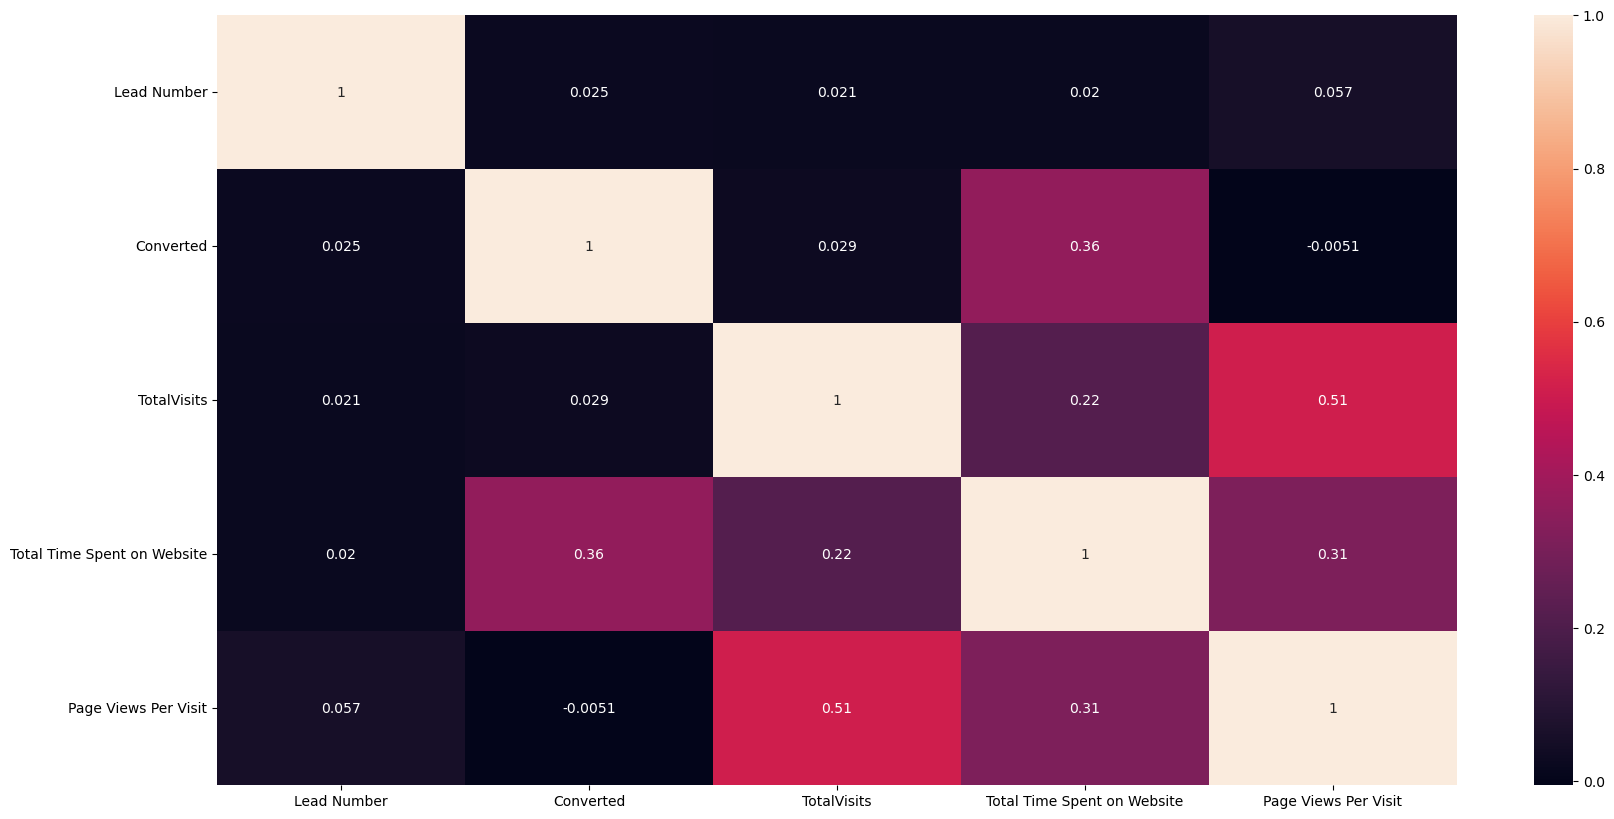

In [2717]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(numerical_df.corr(),annot = True)
plt.show()

In [2718]:
plt.show()

In [2719]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


def get_top_abs_correlations1(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


def get_top_abs_correlations2(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

In [2720]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df_final, 20))

Top Absolute Correlations
Last_Activity_Email Marked Spam         Last_Notable_Activity_Email Marked Spam           1.000000
Last_Activity_Resubscribed to emails    Last_Notable_Activity_Resubscribed to emails      1.000000
Lead_Origin_Lead Import                 Lead_Source_Facebook                              0.981708
Last_Activity_Unsubscribed              Last_Notable_Activity_Unsubscribed                0.874919
Lead_Origin_Lead Add Form               Lead_Source_Reference                             0.852290
Last_Activity_Email Opened              Last_Notable_Activity_Email Opened                0.847200
Last_Activity_SMS Sent                  Last_Notable_Activity_SMS Sent                    0.846874
Lead_Origin_API                         Lead_Origin_Landing Page Submission               0.841701
Enrol_Reason_Better Career Prospects    Enrol_Reason_Flexibility & Convenience            0.816452
Last_Activity_Email Link Clicked        Last_Notable_Activity_Email Link Clicked   

#### Dropping highly correlated dummy variables

In [2721]:

X_train = X_train.drop(['Last_Notable_Activity_Email Marked Spam','Last_Notable_Activity_Resubscribed to emails','Lead_Source_Facebook','Last_Notable_Activity_Unsubscribed','Lead_Source_Reference',
                       'Last_Notable_Activity_Email Opened','Last_Notable_Activity_SMS Sent','Lead_Origin_Landing Page Submission','Enrol_Reason_Flexibility & Convenience','Last_Notable_Activity_Email Link Clicked','Last_Notable_Activity_Email Received','X Education Forums','Last_Notable_Activity_Page Visited on Website','Last_Notable_Activity_Had a Phone Conversation','Country_India'], 1)

C:\Users\j.mandiza\AppData\Local\Temp\ipykernel_36216\394377175.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop(['Last_Notable_Activity_Email Marked Spam','Last_Notable_Activity_Resubscribed to emails','Lead_Source_Facebook','Last_Notable_Activity_Unsubscribed','Lead_Source_Reference',


In [2722]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(X_train, 20))

Top Absolute Correlations
TotalVisits                            Page Views Per Visit                             0.690693
Do Not Email                           Last_Activity_Email Bounced                      0.634394
Lead_Origin_API                        Lead_Source_Olark Chat                           0.609146
Master_Interview_Copy                  Lead_Source_Direct Traffic                       0.596817
Last_Activity_Unreachable              Last_Notable_Activity_Unreachable                0.592030
Page Views Per Visit                   Lead_Source_Olark Chat                           0.523587
Last_Activity_Email Opened             Last_Activity_SMS Sent                           0.507651
Lead_Source_Olark Chat                 Tags_Already a student                           0.503388
Lead_Source_youtubechannel             Country_Canada                                   0.499882
Master_Interview_Copy                  Lead_Origin_API                                  0.476058
Lead

In [2723]:

X_train = X_train.drop(['Page Views Per Visit','Last_Activity_Email Bounced','Lead_Source_Olark Chat','Lead_Source_Direct Traffic','Last_Notable_Activity_Unreachable'], 1)


C:\Users\j.mandiza\AppData\Local\Temp\ipykernel_36216\825980507.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop(['Page Views Per Visit','Last_Activity_Email Bounced','Lead_Source_Olark Chat','Lead_Source_Direct Traffic','Last_Notable_Activity_Unreachable'], 1)


In [2724]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(X_train, 20))

Top Absolute Correlations
Last_Activity_Email Opened             Last_Activity_SMS Sent                           0.507651
Lead_Source_youtubechannel             Country_Canada                                   0.499882
Master_Interview_Copy                  Lead_Origin_API                                  0.476058
Lead_Origin_API                        City_Mumbai                                      0.463215
Last_Activity_Olark Chat Conversation  Tags_Already a student                           0.454818
Tags_Ringing                           Tags_Will revert after reading the email         0.443981
Lead_Origin_Lead Add Form              Lead_Source_Welingak Website                     0.437871
Last_Activity_Olark Chat Conversation  Last_Notable_Activity_Olark Chat Conversation    0.423278
Tags_Already a student                 Lead_Profile_Student of SomeSchool               0.415634
Newspaper Article                      Digital Advertisement                            0.408024
Occu

###  Model Building
 after splitting data into a training set and a test set and removing highly Correlated Data

In [2725]:
import statsmodels.api as sm

In [2726]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\j.mandiza\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\j.mandiza\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\j.mandiza\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6384
Model:                            GLM   Df Residuals:                     6236
Model Family:                Binomial   Df Model:                          147
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 07 Mar 2023   Deviance:                       85104.
Time:                        14:34:41   Pearson chi2:                 4.16e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                            -5.843e+14    8.4e+05  -6.96e+08      0.000   -5.84e+14   -5.84e+14
TotalVisits                                       4.108e+13   1.12e+06   3.66e+07      0.000    4.11e+13    4.11e+13
Total Time Spent on Website                       4.253e+14   9.78e+05   4.35e+08      0.000    4.25e+14    4.25e+14
Do Not Email                                     -9.494e+13   1.22e+06   -7.8e+07      0.000   -9.49e+13   -9.49e+13
Do Not Call                                       5.577e+14   8.47e+05   6.59e+08      0.000    5.58e+14    5.58e+14
Search                                            -1.77e+13    9.1e+05  -1.95e+07      0.000   -1.77e+13   -1.77e+13
Magazine                                             1.7133   4.73e-08   3.62e+07      0.000       1.713       1.713
Newspaper Article                                 1.771e+13   9.64e+05   1.84e+07      0.000    1.77e+13    1.77e+13
Newspaper                                        -2.506e+13   8.44e+05  -2.97e+07      0.000   -2.51e+13   -2.51e+13
Digital Advertisement                            -1.591e+13   9.39e+05  -1.69e+07      0.000   -1.59e+13   -1.59e+13
Through Recommendations                          -3.946e+13    9.5e+05  -4.15e+07      0.000   -3.95e+13   -3.95e+13
Course_Updates                                       0.2958   8.14e-09   3.63e+07      0.000       0.296       0.296
Supply_chain_content                                 1.9480   1.97e-08   9.87e+07      0.000       1.948       1.948
DM_Content                                           0.8129    3.8e-08   2.14e+07      0.000       0.813       0.813
Cheque_Payment                                       4.0427   6.44e-08   6.28e+07      0.000       4.043       4.043
Master_Interview_Copy                            -2.574e+13   1.61e+06   -1.6e+07      0.000   -2.57e+13   -2.57e+13
Lead_Origin_API                                   1.049e+14   1.87e+06   5.62e+07      0.000    1.05e+14    1.05e+14
Lead_Origin_Lead Add Form                         1.396e+14   1.44e+06   9.71e+07      0.000     1.4e+14     1.4e+14
Lead_Origin_Lead Import                          -4.828e+13   9.11e+05   -5.3e+07      0.000   -4.83e+13   -4.83e+13
Lead_Source_Click2call                            4.976e+14   8.46e+05   5.88e+08      0.000    4.98e+14    4.98e+14
Lead_Source_Google                                -1.83e+14   1.22e+06   -1.5e+08      0.000   -1.83e+14   -1.83e+14
Lead_Source_Live Chat                             3.573e+13   8.42e+05   4.24e+07      0.000    3.57e+13    3.57e+13
Lead_Source_NC_EDM                                4.695e+13   8.51e+05   5.52e+07      0.000     4.7e+13     4.7e+13
Lead_Source_Organic Search               

### Feature Selection Using RFE

In [2727]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [2728]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [2729]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True, False, False, False, False,
       False, False,

In [2730]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Do Not Email', False, 11),
 ('Do Not Call', False, 29),
 ('Search', False, 132),
 ('Magazine', False, 136),
 ('Newspaper Article', False, 67),
 ('Newspaper', False, 55),
 ('Digital Advertisement', False, 120),
 ('Through Recommendations', False, 68),
 ('Course_Updates', False, 138),
 ('Supply_chain_content', False, 140),
 ('DM_Content', False, 142),
 ('Cheque_Payment', False, 141),
 ('Master_Interview_Copy', False, 35),
 ('Lead_Origin_API', False, 46),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 33),
 ('Lead_Source_Click2call', False, 51),
 ('Lead_Source_Google', True, 1),
 ('Lead_Source_Live Chat', False, 79),
 ('Lead_Source_NC_EDM', False, 72),
 ('Lead_Source_Organic Search', False, 3),
 ('Lead_Source_Other Sources', False, 30),
 ('Lead_Source_Press_Release', False, 135),
 ('Lead_Source_Referral Sites', False, 25),
 ('Lead_Source_Social Media', False, 107),
 ('Lead_Source_WeLea

In [2731]:
col = X_train.columns[rfe.support_]

In [2732]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Do Not Email', 'Do Not Call', 'Search', 'Magazine',
       'Newspaper Article', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Course_Updates',
       ...
       'City_Mumbai', 'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Last_Notable_Activity_Approached upfront',
       'Last_Notable_Activity_Email Bounced',
       'Last_Notable_Activity_Form Submitted on Website',
       'Last_Notable_Activity_Olark Chat Conversation'],
      dtype='object', length=145)

##### Assessing the model with StatsModels

In [2733]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6384
Model:                            GLM   Df Residuals:                     6368
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1644.6
Date:                Tue, 07 Mar 2023   Deviance:                       3289.3
Time:                        14:34:47   Pearson chi2:                 9.95e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5591
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3915    371.461     -0.004      0.997    -729.441     726.658
Total Time Spent on Website                  0.9987      0.049     20.296      0.000       0.902       1.095
Lead_Origin_Lead Add Form                    0.5911      0.067      8.885      0.000       0.461       0.721
Lead_Source_Google                          -0.4199      0.048     -8.710      0.000      -0.514      -0.325
Last_Activity_SMS Sent                       0.9242      0.047     19.799      0.000       0.833       1.016
Occupation_Working Professional              0.6496      0.071      9.160      0.000       0.511       0.789
Tags_Already a student                       0.7373      0.060     12.294      0.000       0.620       0.855
Tags_Busy                                    0.4309      0.035     12.248      0.000       0.362       0.500
Tags_Closed by Horizzon                      1.6181      0.145     11.178      0.000       1.334       1.902
Tags_Lost to EINS                            1.0912      0.079     13.735      0.000       0.936       1.247
Tags_Not doing further education            -2.8116   2296.259     -0.001      0.999   -4503.396    4497.773
Tags_Will revert after reading the email     1.8654      0.067     27.911      0.000       1.734       1.996
Tags_invalid number                         -2.0809   2373.481     -0.001      0.999   -4654.018    4649.857
Lead_Profile_Potential Lead                  0.7287      0.052     14.084      0.000       0.627       0.830
Lead_Profile_Student of SomeSchool          -0.4762      0.126     -3.774      0.000      -0.723      -0.229
Last_Notable_Activity_Modified              -0.6866      0.051    -13.409      0.000      -0.787      -0.586
============================================================================================================
"""

In [2734]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4725    1.618804e-03
3974    3.630963e-03
8332    9.698891e-12
5814    1.045417e-01
6493    1.915307e-01
304     4.700588e-03
7068    6.191050e-01
8043    8.461817e-01
7874    3.229067e-01
7959    8.916951e-01
dtype: float64

In [2735]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.61880361e-03, 3.63096327e-03, 9.69889051e-12, 1.04541669e-01,
       1.91530660e-01, 4.70058828e-03, 6.19105039e-01, 8.46181656e-01,
       3.22906735e-01, 8.91695069e-01])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [2736]:
y_train_pred_final = pd.DataFrame({'Coverted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Coverted,Convert_Prob,LeadID
0,0,1.618804e-03,4725
1,0,3.630963e-03,3974
2,0,9.698891e-12,8332
3,0,1.045417e-01,5814
4,1,1.915307e-01,6493


##### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [2737]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Coverted,Convert_Prob,LeadID,predicted
0,0,1.618804e-03,4725,0
1,0,3.630963e-03,3974,0
2,0,9.698891e-12,8332,0
3,0,1.045417e-01,5814,0
4,1,1.915307e-01,6493,0


In [2738]:
from sklearn import metrics

In [2739]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Coverted, y_train_pred_final.predicted )
print(confusion)

[[3661  257]
 [ 436 2030]]


In [2740]:
# Predicted     not_converted    converted
# Actual
# not_churn        3661             257
# churn            436              2030  

In [2741]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Coverted, y_train_pred_final.predicted))

0.8914473684210527


#### Checking VIFs

In [2742]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2743]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,1.54
5,Tags_Already a student,1.50
1,Lead_Origin_Lead Add Form,1.41
7,Tags_Closed by Horizzon,1.34
0,Total Time Spent on Website,1.22
13,Lead_Profile_Student of SomeSchool,1.22
12,Lead_Profile_Potential Lead,1.19
2,Lead_Source_Google,1.17
4,Occupation_Working Professional,1.16
3,Last_Activity_SMS Sent,1.13


There are no Features with high VIF. But there are features with high P-Values i.e. **Tags_Not doing further education and Tags_invalid number**. We will drop these features one by one and monitor changes to performance of out model

In [2744]:
col = col.drop('Tags_invalid number', 1)
col

Index(['Total Time Spent on Website', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Google', 'Last_Activity_SMS Sent',
       'Occupation_Working Professional', 'Tags_Already a student',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education',
       'Tags_Will revert after reading the email',
       'Lead_Profile_Potential Lead', 'Lead_Profile_Student of SomeSchool',
       'Last_Notable_Activity_Modified'],
      dtype='object')

In [2745]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6384
Model:                            GLM   Df Residuals:                     6369
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1647.7
Date:                Tue, 07 Mar 2023   Deviance:                       3295.3
Time:                        14:34:47   Pearson chi2:                 1.01e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5587
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.2063    298.267     -0.004      0.997    -585.800     583.387
Total Time Spent on Website                  1.0023      0.049     20.365      0.000       0.906       1.099
Lead_Origin_Lead Add Form                    0.5935      0.067      8.903      0.000       0.463       0.724
Lead_Source_Google                          -0.4205      0.048     -8.717      0.000      -0.515      -0.326
Last_Activity_SMS Sent                       0.9233      0.047     19.784      0.000       0.832       1.015
Occupation_Working Professional              0.6517      0.071      9.163      0.000       0.512       0.791
Tags_Already a student                       0.7479      0.060     12.486      0.000       0.630       0.865
Tags_Busy                                    0.4352      0.035     12.377      0.000       0.366       0.504
Tags_Closed by Horizzon                      1.6236      0.145     11.214      0.000       1.340       1.907
Tags_Lost to EINS                            1.0953      0.079     13.784      0.000       0.940       1.251
Tags_Not doing further education            -2.8084   2295.426     -0.001      0.999   -4501.762    4496.145
Tags_Will revert after reading the email     1.8800      0.067     28.165      0.000       1.749       2.011
Lead_Profile_Potential Lead                  0.7299      0.052     14.110      0.000       0.629       0.831
Lead_Profile_Student of SomeSchool          -0.4771      0.126     -3.782      0.000      -0.724      -0.230
Last_Notable_Activity_Modified              -0.6856      0.051    -13.378      0.000      -0.786      -0.585
============================================================================================================
"""

In [2746]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [2747]:
y_train_pred[:10]

array([1.57015411e-03, 3.52491131e-03, 9.73619138e-12, 1.01436089e-01,
       1.90936460e-01, 4.54470101e-03, 6.17986613e-01, 8.46703642e-01,
       3.22616694e-01, 8.92469361e-01])

In [2748]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [2749]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Coverted,Convert_Prob,LeadID,predicted
0,0,1.570154e-03,4725,0
1,0,3.524911e-03,3974,0
2,0,9.736191e-12,8332,0
3,0,1.014361e-01,5814,0
4,1,1.909365e-01,6493,0


In [2750]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Coverted, y_train_pred_final.predicted))

0.8916040100250626


Accurancy has not dropped much

##### Checking VIFs again

In [2751]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,1.52
5,Tags_Already a student,1.49
1,Lead_Origin_Lead Add Form,1.41
7,Tags_Closed by Horizzon,1.34
0,Total Time Spent on Website,1.22
12,Lead_Profile_Student of SomeSchool,1.22
11,Lead_Profile_Potential Lead,1.19
2,Lead_Source_Google,1.17
4,Occupation_Working Professional,1.16
3,Last_Activity_SMS Sent,1.13


**Tags_Not doing further education** still has high P-Value. We will drop the feature

In [2752]:
col = col.drop('Tags_Not doing further education', 1)
col

Index(['Total Time Spent on Website', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Google', 'Last_Activity_SMS Sent',
       'Occupation_Working Professional', 'Tags_Already a student',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email',
       'Lead_Profile_Potential Lead', 'Lead_Profile_Student of SomeSchool',
       'Last_Notable_Activity_Modified'],
      dtype='object')

In [2753]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6384
Model:                            GLM   Df Residuals:                     6370
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1651.0
Date:                Tue, 07 Mar 2023   Deviance:                       3302.0
Time:                        14:34:47   Pearson chi2:                 1.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5582
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.8562      0.063    -13.675      0.000      -0.979      -0.733
Total Time Spent on Website                  1.0045      0.049     20.406      0.000       0.908       1.101
Lead_Origin_Lead Add Form                    0.5882      0.066      8.911      0.000       0.459       0.718
Lead_Source_Google                          -0.4206      0.048     -8.712      0.000      -0.515      -0.326
Last_Activity_SMS Sent                       0.9279      0.047     19.894      0.000       0.836       1.019
Occupation_Working Professional              0.6461      0.070      9.173      0.000       0.508       0.784
Tags_Already a student                       0.7589      0.060     12.682      0.000       0.642       0.876
Tags_Busy                                    0.4394      0.035     12.491      0.000       0.370       0.508
Tags_Closed by Horizzon                      1.6320      0.145     11.274      0.000       1.348       1.916
Tags_Lost to EINS                            1.1009      0.079     13.853      0.000       0.945       1.257
Tags_Will revert after reading the email     1.8972      0.067     28.489      0.000       1.767       2.028
Lead_Profile_Potential Lead                  0.7275      0.052     14.125      0.000       0.627       0.828
Lead_Profile_Student of SomeSchool          -0.4772      0.126     -3.783      0.000      -0.725      -0.230
Last_Notable_Activity_Modified              -0.6892      0.051    -13.473      0.000      -0.789      -0.589
============================================================================================================
"""

In [2754]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [2755]:
y_train_pred[:10]

array([0.00150643, 0.003382  , 0.03186055, 0.09927795, 0.19098321,
       0.00439023, 0.61910298, 0.84833843, 0.32301863, 0.89076177])

In [2756]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [2757]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Coverted,Convert_Prob,LeadID,predicted
0,0,0.001506,4725,0
1,0,0.003382,3974,0
2,0,0.031861,8332,0
3,0,0.099278,5814,0
4,1,0.190983,6493,0


In [2758]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Coverted, y_train_pred_final.predicted))

0.8914473684210527


Accurancy has not dropped much

### Cheking other Metrics beyond  Accuracy

In [2759]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [2760]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8231954582319546

In [2761]:
# Let us calculate specificity
TN / float(TN+FP)

0.9344053088310362

In [2762]:
# Calculate false postive rate - predicting Converted when customer does not convert
print(FP/ float(TN+FP))

0.06559469116896376


In [2763]:
# positive predictive value 
print (TP / float(TP+FP))

0.8876257105378225


In [2764]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8935806687820357


### Plotting the ROC Curve

In [2765]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2766]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Coverted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

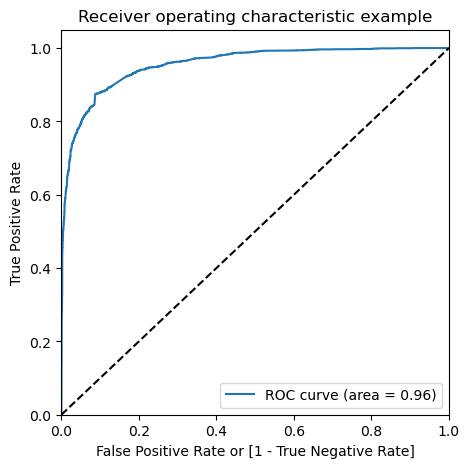

In [2767]:
draw_roc(y_train_pred_final.Coverted, y_train_pred_final.Convert_Prob)

### Finding Optimal Cutoff Point

In [2768]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Coverted,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001506,4725,0,1,0,0,0,0,0,0,0,0,0
1,0,0.003382,3974,0,1,0,0,0,0,0,0,0,0,0
2,0,0.031861,8332,0,1,0,0,0,0,0,0,0,0,0
3,0,0.099278,5814,0,1,0,0,0,0,0,0,0,0,0
4,1,0.190983,6493,0,1,1,0,0,0,0,0,0,0,0


In [2769]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Coverted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386278  1.000000  0.000000
0.1   0.1  0.789317  0.965531  0.678407
0.2   0.2  0.842888  0.944850  0.778714
0.3   0.3  0.867168  0.922952  0.832057
0.4   0.4  0.895363  0.875507  0.907861
0.5   0.5  0.891447  0.821979  0.935171
0.6   0.6  0.888941  0.790349  0.950995
0.7   0.7  0.884868  0.753852  0.967330
0.8   0.8  0.862469  0.674371  0.980858
0.9   0.9  0.828947  0.570154  0.991833


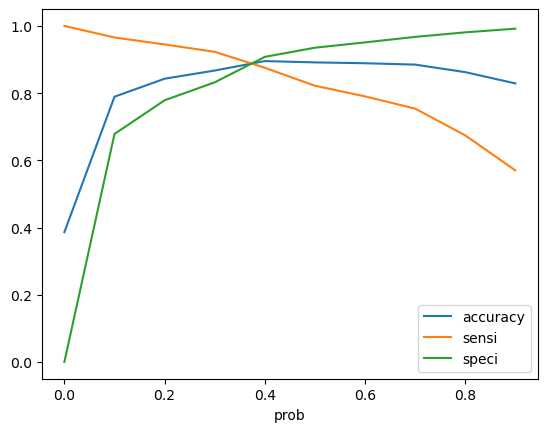

In [2770]:
# Plottingaccuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [2771]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Coverted,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.001506,4725,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.003382,3974,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.031861,8332,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.099278,5814,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.190983,6493,0,1,1,0,0,0,0,0,0,0,0,0


In [2772]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Coverted, y_train_pred_final.final_predicted)

0.8671679197994987

In [2773]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Coverted, y_train_pred_final.final_predicted )
confusion2

array([[3260,  658],
       [ 190, 2276]], dtype=int64)

In [2774]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2775]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9229521492295215

In [2776]:
# Let us calculate specificity
TN / float(TN+FP)

0.8320571720265442

In [2777]:
# Calculate false postive rate - predicting converted when lead does not have convert
print(FP/ float(TN+FP))

0.16794282797345583


In [2778]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7757327880027266


In [2779]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9449275362318841


## Precision and Recall

In [2780]:
confusion = metrics.confusion_matrix(y_train_pred_final.Coverted, y_train_pred_final.predicted )
confusion

array([[3664,  254],
       [ 439, 2027]], dtype=int64)

In [2781]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8886453309951775

In [2782]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8219789132197891

### Precision and recall tradeoff

In [2783]:
from sklearn.metrics import precision_recall_curve

In [2784]:
y_train_pred_final.Coverted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6379    0
 6380    1
 6381    0
 6382    1
 6383    0
 Name: Coverted, Length: 6384, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6379    0
 6380    1
 6381    0
 6382    1
 6383    0
 Name: predicted, Length: 6384, dtype: int64)

In [2785]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Coverted, y_train_pred_final.Convert_Prob)

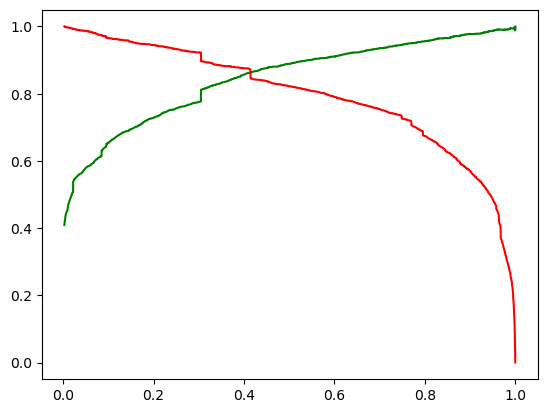

In [2786]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [2787]:

X_test[column_names] = scaler.transform(X_test[column_names])

In [2788]:
#Dropping highly correlated columns
X_test = X_test.drop(['Last_Notable_Activity_Email Marked Spam','Last_Notable_Activity_Resubscribed to emails','Lead_Source_Facebook','Last_Notable_Activity_Unsubscribed','Lead_Source_Reference',
                       'Last_Notable_Activity_Email Opened','Last_Notable_Activity_SMS Sent','Lead_Origin_Landing Page Submission','Enrol_Reason_Flexibility & Convenience','Last_Notable_Activity_Email Link Clicked','Last_Notable_Activity_Email Received','X Education Forums','Last_Notable_Activity_Page Visited on Website','Last_Notable_Activity_Had a Phone Conversation','Country_India'], 1)
                       
                       
                       
X_test = X_test.drop(['Page Views Per Visit','Last_Activity_Email Bounced','Lead_Source_Olark Chat','Lead_Source_Direct Traffic','Last_Notable_Activity_Unreachable'], 1)




C:\Users\j.mandiza\AppData\Local\Temp\ipykernel_36216\3768685195.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test.drop(['Last_Notable_Activity_Email Marked Spam','Last_Notable_Activity_Resubscribed to emails','Lead_Source_Facebook','Last_Notable_Activity_Unsubscribed','Lead_Source_Reference',
C:\Users\j.mandiza\AppData\Local\Temp\ipykernel_36216\3768685195.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test.drop(['Page Views Per Visit','Last_Activity_Email Bounced','Lead_Source_Olark Chat','Lead_Source_Direct Traffic','Last_Notable_Activity_Unreachable'], 1)


In [2789]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Google,Last_Activity_SMS Sent,Occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Lead_Profile_Potential Lead,Lead_Profile_Student of SomeSchool,Last_Notable_Activity_Modified
3605,-0.547828,-0.292455,1.490298,-0.647775,-0.293085,-0.38309,-0.144741,-0.201462,-0.140742,1.140049,-0.460016,-0.1659,1.300538
5257,-0.884923,-0.292455,-0.671007,-0.647775,-0.293085,-0.38309,-0.144741,-0.201462,-0.140742,-0.877155,-0.460016,-0.1659,-0.768912
951,-0.481915,-0.292455,1.490298,-0.647775,-0.293085,-0.38309,-0.144741,-0.201462,-0.140742,1.140049,-0.460016,-0.1659,-0.768912
6372,0.469108,-0.292455,1.490298,1.543745,-0.293085,-0.38309,-0.144741,-0.201462,-0.140742,1.140049,-0.460016,-0.1659,-0.768912
7404,1.214861,-0.292455,-0.671007,-0.647775,-0.293085,-0.38309,-0.144741,-0.201462,-0.140742,1.140049,-0.460016,-0.1659,-0.768912


In [2790]:
X_test_sm = sm.add_constant(X_test)

In [2791]:
y_test_pred = res.predict(X_test_sm)

In [2792]:
y_test_pred[:10]

3605    0.056114
5257    0.009442
951     0.209137
6372    0.840064
7404    0.782999
2547    0.970963
6176    0.067891
3312    0.130493
3658    0.159097
2395    0.020339
dtype: float64

In [2793]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [2794]:
# Let's see the head
y_pred_1.head()

,0
3605,0.056114
5257,0.009442
951,0.209137
6372,0.840064
7404,0.782999


In [2795]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [2796]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [2797]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2798]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [2799]:
y_pred_final.head()

,Converted,LeadID,0
0,0,3605,0.056114
1,0,5257,0.009442
2,0,951,0.209137
3,1,6372,0.840064
4,1,7404,0.782999


In [2800]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [2803]:
y_pred_final.head()

,Converted,LeadID,Convert_Prob
0,0,3605,0.056114
1,0,5257,0.009442
2,0,951,0.209137
3,1,6372,0.840064
4,1,7404,0.782999


In [2806]:
# Rearranging the columns
y_pred_final = y_pred_final[['LeadID', 'Converted', 'Convert_Prob']]


In [2807]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Convert_Prob
0,3605,0,0.056114
1,5257,0,0.009442
2,951,0,0.209137
3,6372,1,0.840064
4,7404,1,0.782999


In [2808]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.42 else 0)

C:\Users\j.mandiza\AppData\Local\Temp\ipykernel_36216\2303562751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.42 else 0)


In [2809]:
y_pred_final.head()

,LeadID,Converted,Convert_Prob,final_predicted
0,3605,0,0.056114,0
1,5257,0,0.009442,0
2,951,0,0.209137,0
3,6372,1,0.840064,1
4,7404,1,0.782999,1


In [2810]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.896967482645232

In [2811]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1567,  145],
       [ 137,  888]], dtype=int64)

In [2812]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2813]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8663414634146341

In [2814]:
# Let us calculate specificity
TN / float(TN+FP)

0.915303738317757

It seems Lead Quality is NaN where the user did give